In [1]:
%matplotlib inline
import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [2]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
df.isnull().sum()

iso_code                                        0
continent                                   14352
location                                        0
date                                            0
total_cases                                 35741
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative                292217
excess_mortality                           292217
excess_mortality_cumulative_per_million    292217
Length: 67, dtype: int64

In [19]:
print(df['location'].unique())


['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'European Union' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland'
 'France' 'French Guiana' 'French Polynesia' '

In [30]:
# Filter the dataset for countries of interest 
countries_of_interest = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)].copy()

In [32]:
# Drop rows with missing 'date' or 'total_cases' values
df_filtered = df_filtered.dropna(subset=['date', 'total_cases']).copy()

In [34]:
# Convert 'date' column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date']).copy()

In [35]:
# Fill or interpolate missing numerical values
df_filtered = df_filtered.fillna(method='ffill').copy()

In [10]:
# Plot total cases over time for selected countries
import matplotlib.pyplot as plt
import seaborn as sns


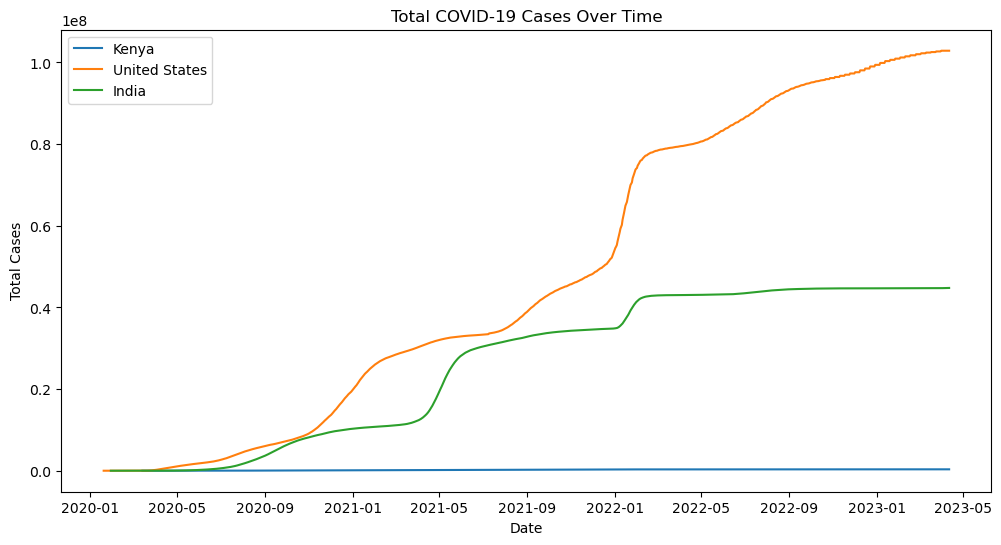

In [37]:
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

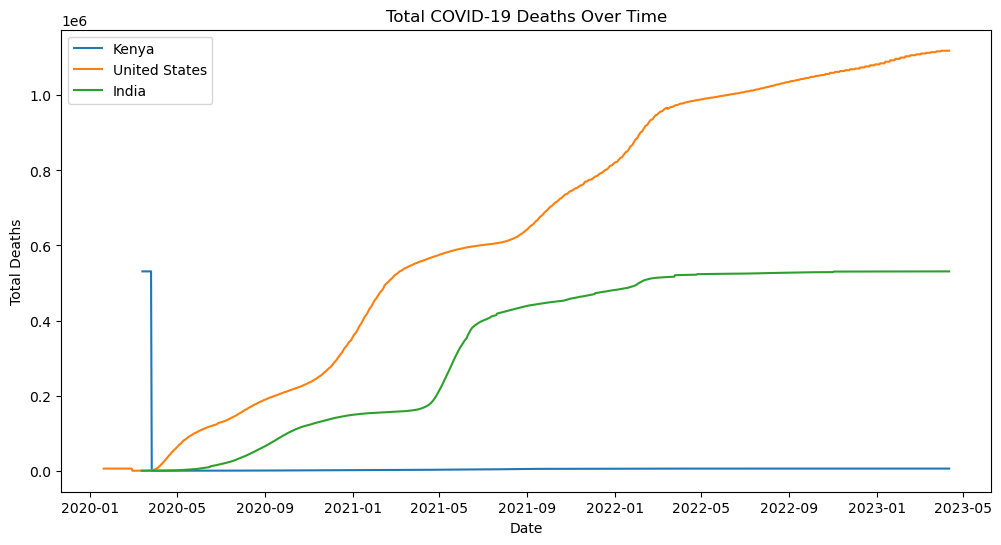

In [38]:
# Plot total deaths over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

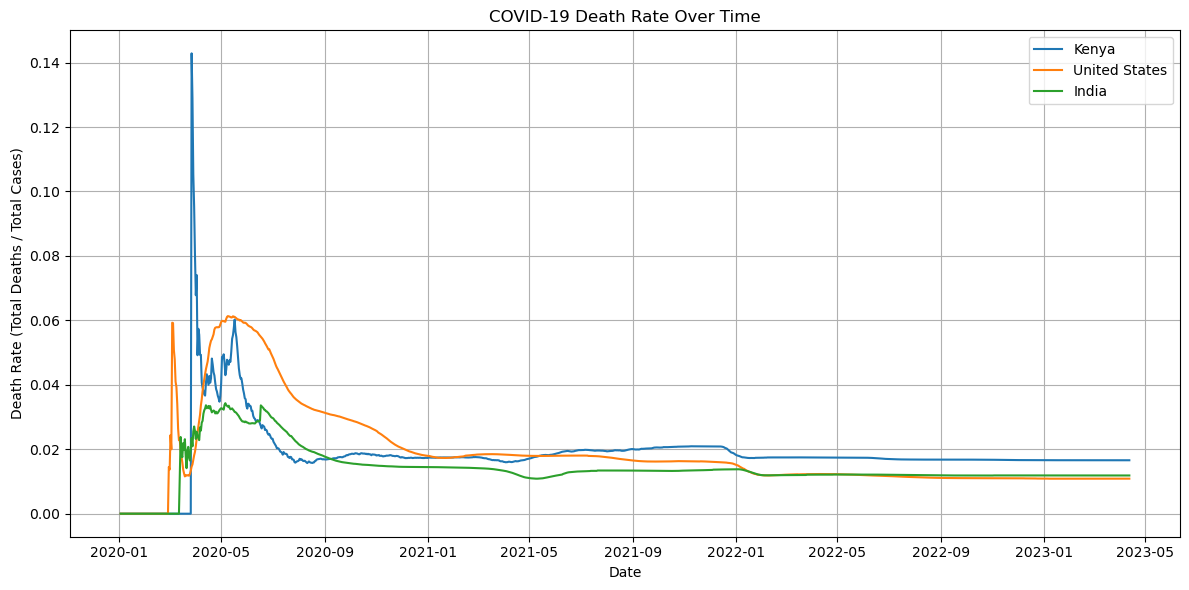

In [51]:


# Calculate death rate and fill NaNs with 0
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
df_filtered['death_rate'] = df_filtered['death_rate'].fillna(0)

# Plot death rate over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (Total Deaths / Total Cases)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


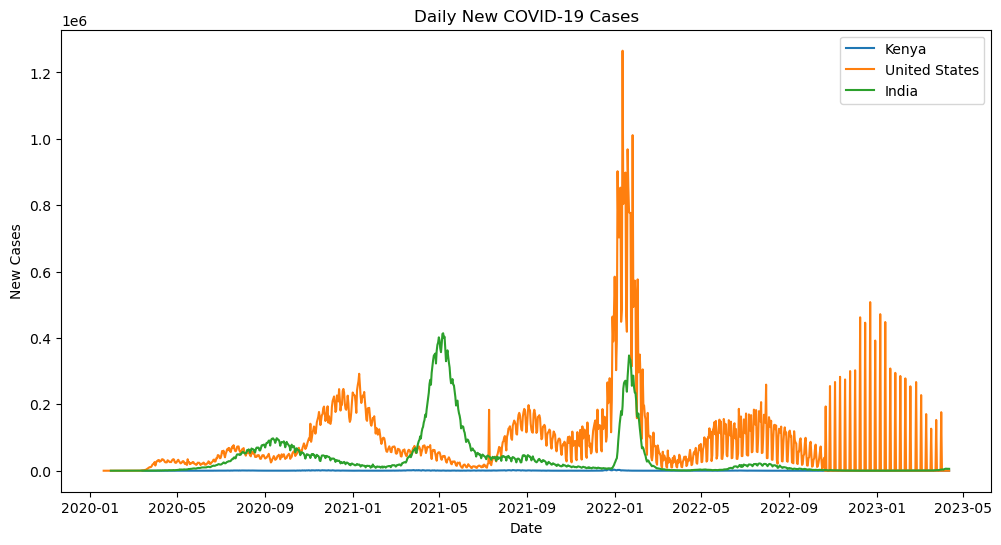

In [46]:
# Compare daily new cases between countries
df_filtered.loc ['new_cases'] = df_filtered.groupby('location')['new_cases'].transform(lambda x: x.fillna(0))
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()


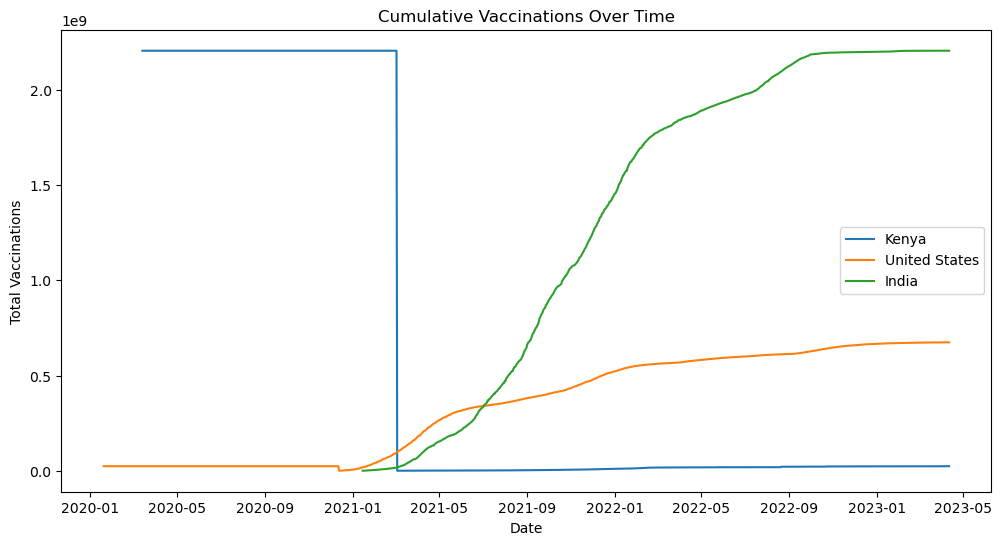

In [40]:
# Plot cumulative vaccinations over time for selected countries
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Cumulative Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()

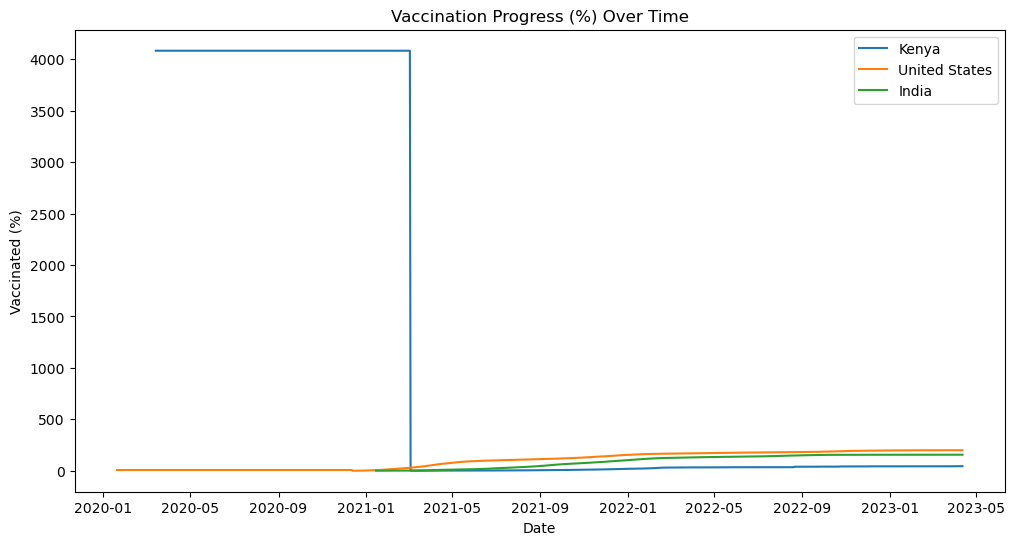

In [41]:
# Compare % vaccinated population
df_filtered['vaccination_percentage'] = df_filtered['total_vaccinations'] / df_filtered['population'] * 100
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['vaccination_percentage'], label=country)
plt.title('Vaccination Progress (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Vaccinated (%)')
plt.legend()
plt.show()

In [49]:
# Calculate death rate: total_deaths / total_cases
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
df_filtered['death_rate'] = df_filtered['death_rate'].fillna(0)

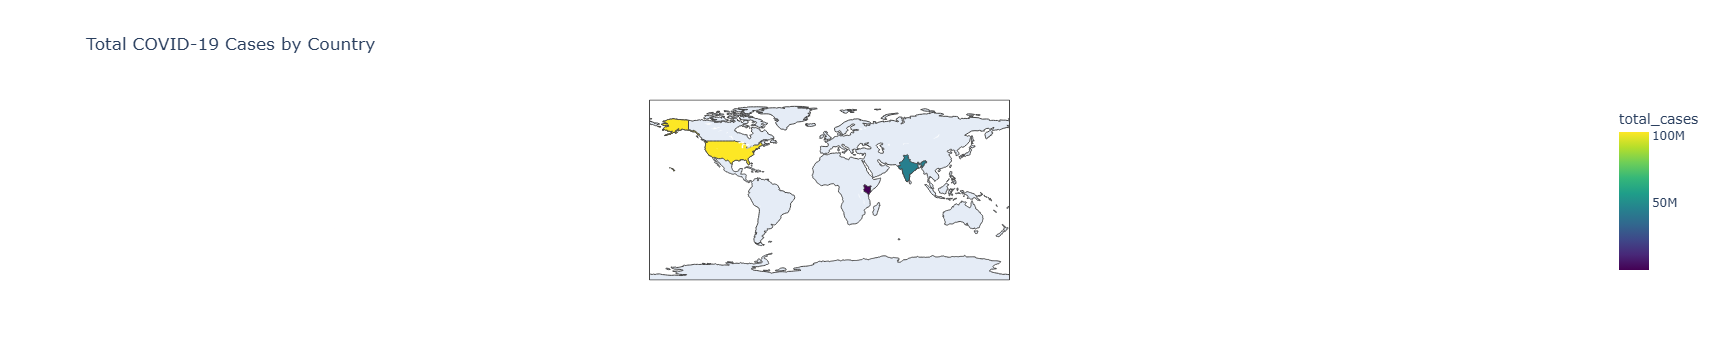

In [48]:
# Prepare dataframe for choropleth map
import plotly.express as px
latest_data = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
latest_data = latest_data[['iso_code', 'total_cases', 'total_vaccinations']]

# Plot the choropleth for COVID-19 cases
fig = px.choropleth(latest_data, 
                    locations='iso_code',
                    color='total_cases',
                    hover_name='iso_code',
                    color_continuous_scale='Viridis',
                    title='Total COVID-19 Cases by Country')
fig.show()

Insights
- United States had the highest total cases overall.
-*Indi* experienced sharp waves in mid-2021.
**Ken** reported lower numbers, possibly due to limited testin

Anomalies and patterns

- The United States saw a rapid vaccinrollout t early on, but vaccination rates plateaued after mid-2021.
- India experienced a major spike in daily new cases in April–May 2021, driven by the Delta variant.
- Kenya had relatively lower reported cases and deaths, but this may reflect testing limitations.
- In early stages of the pandemic, death rates were higher, possibly due to limited medical response capacity.
- Some countries show irregular jumps in case numbers — these are likely due to delayed data updates or reclassifications.
g.